# UCI Evaluation Report

The ICTS frequently holds workshops
regarding NIH’s Loan Repayment Program. The target audience of this workshop is primarily
pre and post-doctoral scholars and early career researchers at UCI.
The NIH Loan Repayment Programs (LRPs) are designed to help repay educational debt for
health professionals with doctoral-level degrees conducting biomedical or behavioral research.
This information session hosted by the Institute of Clinical and Translational Science (ICTS) is
intended for post-doctoral fellows and junior faculty interested in preparing an application for the
NIH LRPs.

This section includes:
• The program/event that the survey was created for
• A short description of the program/event
• The date/duration of the program/event
• The survey’s target audience
• The number of people that received the survey invitation
• The number of respondents (as well as the response percentage: %, N)
• If demographic information is collected for this survey, describe the general population of the respondents
• Key points regarding the evaluative data should be highlighted, which could include data regarding general program/event
satisfaction or specific survey items and qualitative data that are important to showcase

## Initializing and Preparing Data

In [169]:
# loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [190]:
data = pd.read_csv('/Users/sarachong/Downloads/TEMPLATECOPYNIHLoanR_DATA_2026-01-13- RAW Data.csv')
data = data.drop(columns=['loan_repayment_workshop_complete', 'record_id'])

In [191]:
data = data.replace('.', np.nan)
data = data.replace('Post doc', 'Postdoc')
change = ['length', 'valuable', 'implement_workshop', 'strategies']
for i in change:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    data[i] = data[i].fillna(round(data[i].mean()))
    data[i] = data[i].astype(int)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   uci_affiliation            13 non-null     int64 
 1   uci_affiliation_other      3 non-null      object
 2   uci_department             13 non-null     object
 3   loan_process               13 non-null     int64 
 4   necessary_tools            13 non-null     int64 
 5   enjoyed                    13 non-null     int64 
 6   relevant                   13 non-null     int64 
 7   organized                  13 non-null     int64 
 8   length                     13 non-null     int64 
 9   valuable                   13 non-null     int64 
 10  implement_workshop         13 non-null     int64 
 11  strategies                 13 non-null     int64 
 12  use_info_learned_workshop  4 non-null      object
 13  impression_workshop        4 non-null      object
 14  suggestions_

In [175]:
data

,uci_affiliation,uci_affiliation_other,uci_department,loan_process,necessary_tools,enjoyed,relevant,organized,length,valuable,implement_workshop,strategies,use_info_learned_workshop,impression_workshop,suggestions_workshop,affiliation
0,2,NaN,Social Ecology,6,5,7,6,6,7,7,5,6,I will likely apply next year this will help m...,it was very accessible and welcoming,not at the moment perhaps as I apply.,Staff
1,1,NaN,Medicine,5,6,7,7,7,7,7,5,7,NaN,NaN,NaN,Faculty
2,4,Postdoc,Biomedical Engineering,7,7,7,7,7,7,7,7,7,I will evaluate my options for applying to thi...,The workshop is a great resource for the UCI r...,NaN,Other
3,4,Postdoc,Otolaryngology-Head and Neck Surgery,6,6,5,5,6,7,6,6,6,NaN,NaN,NaN,Other
4,4,Administrative Staff,ICTS,7,7,7,7,7,7,7,7,7,NaN,NaN,NaN,Other
5,2,NaN,Stem Cell,5,5,5,4,4,4,5,5,4,NaN,NaN,NaN,Staff
6,1,NaN,COHS,5,5,3,4,3,4,3,3,4,I probably won't--the only thing I learned was...,Poorly organized and the speakers were not pre...,Instead of relying on random people who have h...,Faculty
7,1,NaN,School of Nursing,7,7,7,7,7,7,7,7,7,NaN,NaN,NaN,Faculty
8,2,NaN,Public Health,6,6,6,6,6,6,6,6,6,NaN,NaN,NaN,Staff
9,2,NaN,Psychiatry and Human Behavior,6,6,6,5,6,6,6,6,6,NaN,NaN,NaN,Staff


## Analyzing the Data

### Participant Profile

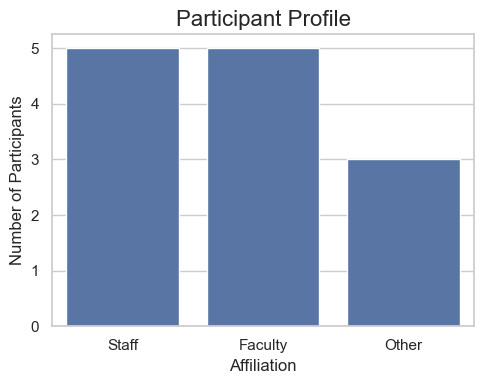

In [183]:
affiliation_dict = {1: 'Faculty', 2: 'Staff', 3:'Student', 4:'Other'}
data['affiliation'] = data['uci_affiliation'].map(affiliation_dict)
affiliation = data['affiliation'].value_counts().reset_index()
affiliation.columns = ['Affiliation', 'Count']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,4))
barplot = sns.barplot(data=affiliation, x='Affiliation', y='Count')

plt.title('Participant Profile', fontsize=16)
plt.xlabel('Affiliation', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

plt.tight_layout()
plt.show()


In [192]:
scale = {3: 'Slightly Disagree', 4: 'Neutral', 5:'Slightly Agree', 6:'Agree', 7:'Strongly Agree'}
order = ['Slightly Disagree', 'Neutral', 'Slightly Agree', 'Agree', 'Strongly Agree']
learning = ['loan_process', 'necessary_tools']
quality = ['enjoyed', 'length', 'relevant', 'valuable']
implement = ['implement_workshop', 'strategies']

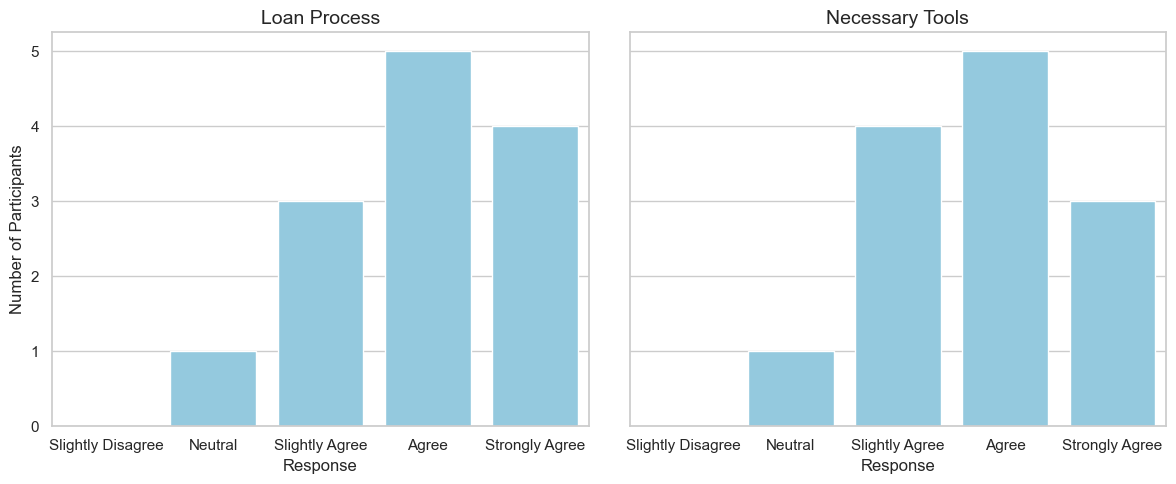

In [193]:

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

for idx, col in enumerate(learning):
    # Map numeric values to scale labels
    data[col] = data[col].map(scale)
    
    # Count responses, including missing categories
    frame = data[col].value_counts().reindex(order, fill_value=0).reset_index()
    frame.columns = ['Scale', 'Count']
    
    sns.barplot(data=frame, x='Scale', y='Count', ax=axes[idx], color='skyblue')
    
    # Titles and labels
    axes[idx].set_title(col.replace("_", " ").title(), fontsize=14)
    axes[idx].set_xlabel('Response')
    if idx == 0:
        axes[idx].set_ylabel('Number of Participants')
    else:
        axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

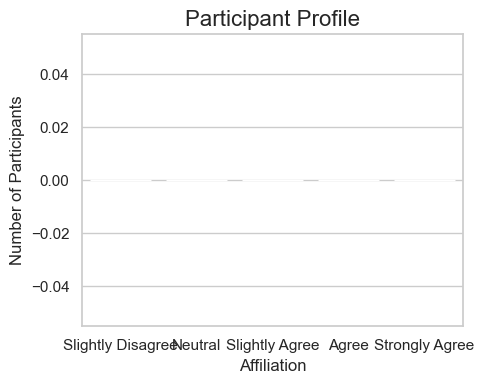

In [163]:
scale = {3: 'Slightly Disagree', 4: 'Neutral', 5:'Slightly Agree', 6:'Agree', 7:'Strongly Agree'}
order = ['Slightly Disagree', 'Neutral', 'Slightly Agree', 'Agree', 'Strongly Agree']
learning = ['loan_process', 'necessary_tools']

data['loan_process'] = data['loan_process'].map(scale)
loan = data['loan_process'].value_counts().reindex(order, fill_value=0).reset_index()
loan.columns = ['Scale', 'Count']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,4))
barplot = sns.barplot(data=loan, x='Scale', y='Count')

plt.title('Participant Profile', fontsize=16)
plt.xlabel('Affiliation', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
workshop enjoyment
enjoyed

impression_workshop

In [ ]:
will use info learned
implement_workshop

strategies

SyntaxError: invalid syntax (3848329689.py, line 1)

In [ ]:
comments